In [2]:
import numpy as np
import matplotlib.pyplot as plt
from math import sin

# Q - предполагаемая ошибка в центре этого раунда
Q = 0.25
# R - погрешность измерения следующего раунда
R = 0.27
# Accumulated_Error - это оценочная ошибка предыдущего раунда, которая представляется как накопление всех ошибок.
Accumulated_Error = 1
# Начальное старое значение
kalman_adc_old = 0

SCOPE = 50


In [3]:
def kalman(ADC_Value):
    global kalman_adc_old
    global Accumulated_Error

    # Отслеживать, когда новое значение слишком отличается от старого значения
    if (abs(ADC_Value-kalman_adc_old)/SCOPE > 0.25):
        Old_Input = ADC_Value*0.382 + kalman_adc_old*0.618
    else:
        Old_Input = kalman_adc_old

    # Общая ошибка предыдущего раунда = накопленная ошибка ^ 2 + оценочная ошибка ^ 2
    Old_Error_All = (Accumulated_Error**2 + Q**2)**(1/2)

    # R - расчетная ошибка этого раунда
    # H - доверие обеих сторон, рассчитанное с использованием среднеквадратичной ошибки
    H = Old_Error_All**2/(Old_Error_All**2 + R**2)

    # Старое значение + 1.00001 / (1.00001 + 0.1) * (новое значение - старое значение)
    kalman_adc = Old_Input + H * (ADC_Value - Old_Input)

    # Рассчитать новую накопленную ошибку
    Accumulated_Error = ((1 - H)*Old_Error_All**2)**(1/2)
    # Новое значение становится старым значением
    kalman_adc_old = kalman_adc
    return kalman_adc


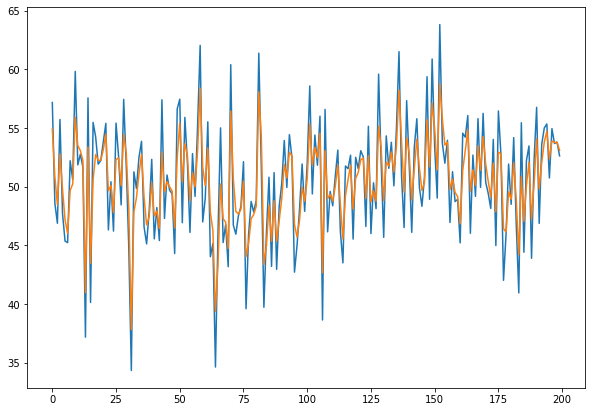

In [5]:
array = np.array([50]*200)
figsize = [10, 7]

s = np.random.normal(0, 5, 200)

test_array = array + s
plt.figure(figsize=figsize)
plt.plot(test_array)
adc=[]
for i in range(200):
    adc.append(kalman(test_array[i]))
    
plt.plot(adc)   
#plt.plot(array)   
plt.show()

In [121]:
# Creating arrays with graphic
resolution = 20

sinus_g = [sin(i / resolution) for i in range(20 * resolution)]

square_g = [(1 if p > 0 else -1) for p in sinus_g]

triangle_g = []
t = -1
for _ in range(20 * resolution):
    t = t+0.035 if t < 1 else -1
    triangle_g.append(t)


In [122]:
def noised(func, k=0.3, prob=0.03):
    o = []
    for p in func:
        r = (np.random.random()*2-1) * k

        # Standard noise and random emissions
        if np.random.random() < prob: c = p + r*7
        else: c = p + r

        o.append(c)
    return o

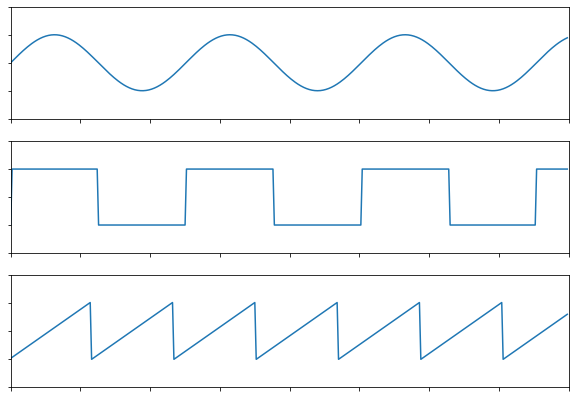

In [123]:
# Output of graphs
graphics = [sinus_g, square_g, triangle_g]
fig, axs = plt.subplots(3, 1, figsize=figsize)

for i in range(len(graphics)):
    axs[i].plot(graphics[i])

    axs[i].set_ylim([-2, 2]), axs[i].set_xlim([0, 20*resolution]),
    axs[i].set_yticklabels([]), axs[i].set_xticklabels([])

plt.show()

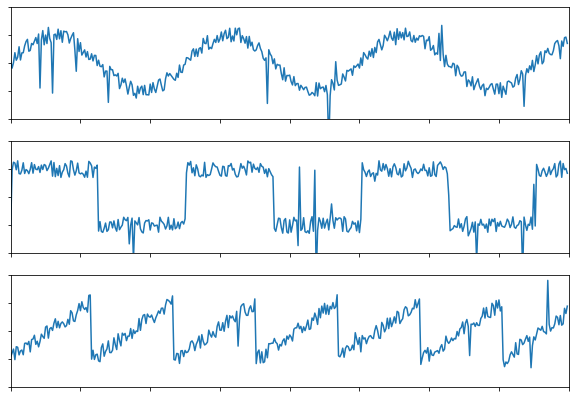

In [124]:
sinus_g = noised(sinus_g)
square_g = noised(square_g)
triangle_g = noised(triangle_g)
figsize = [10, 7]
fig_2, axs_2 = plt.subplots(3, 1, figsize=figsize)
graphics_2 = [sinus_g, square_g, triangle_g]
for i in range(len(graphics_2)):
    axs_2[i].plot(graphics_2[i])

    axs_2[i].set_ylim([-2, 2]), axs_2[i].set_xlim([0, 20*resolution]),
    axs_2[i].set_yticklabels([]), axs_2[i].set_xticklabels([])

plt.show()

400


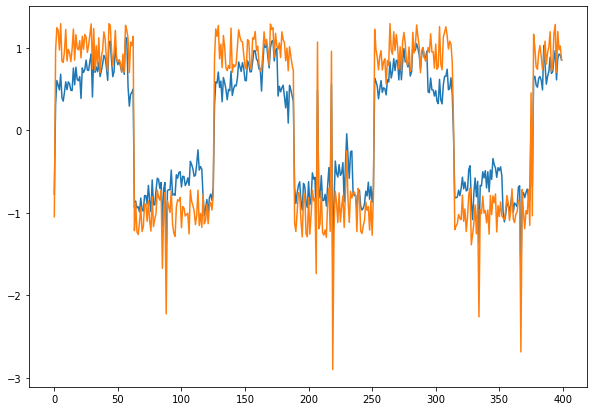

In [126]:
plt.figure(figsize=figsize)
adc_sin = []
adc_triangle = []
adc_square = []
print(len(sinus_g))
for i in range(400):
    adc_sin.append(kalman(sinus_g[i]))
    adc_triangle.append(kalman(triangle_g[i]))
    adc_square.append(kalman(square_g[i]))
    
plt.plot(adc_square)   
plt.plot(square_g)   
plt.show()

https://basegroup.ru/community/articles/kalmanfilter
https://basegroup.ru/community/articles/data-filtration
https://temofeev.ru/info/articles/filtr-kalmana-eto-legko/
https://habr.com/ru/post/166693/
https://habr.com/ru/post/120133/
https://habr.com/ru/post/588270/
https://habr.com/ru/post/140274/